In [3]:
import os

from utils.dataloader import Assistments
from utils.transforms import *
from utils.features import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

%matplotlib inline

# Exploration
Read this notebook to see more about the dataset, types and distributions (or see dataset_description.pdf).

In [4]:
# Load dataset
PATH = 'assistments_2017.csv'

assistments = Assistments(PATH)

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
features_to_drop = [
    'SY ASSISTments Usage',
    'action_num',
    'assistmentId',
    'endTime',
    'hint',
    'hintCount',
    'frPast5HelpRequest',
    'frPast8HelpRequest',
    'past8BottomOut',
    'frPast5WrongCount',
    'frPast8WrongCount',
    'frWorkingInSchool',
    'endsWithScaffolding',
    'endsWithAutoScaffolding',
    'frTimeTakenOnScaffolding',
    'frTotalSkillOpportunitiesScaffolding',
    'frIsHelpRequestScaffolding',
    'sumRight',
    'sumTime3SDWhen3RowRight',
    'sumTimePerSkill',
    'Prev5count',
    'manywrong',
    'confidence(BORED)', 
    'confidence(CONCENTRATING)',
    'confidence(CONFUSED)', 
    'confidence(FRUSTRATED)',
    'confidence(OFF TASK)', 
    'confidence(GAMING)',
    'RES_BORED',
    'RES_CONCENTRATING', 
    'RES_CONFUSED', 
    'RES_FRUSTRATED', 
    'RES_OFFTASK',
    'RES_GAMING',
    'Ln-1',
    'Ln',
]

In [6]:
steps = [
    DropColumns(features_to_drop),
    DropWhere(lambda row: row['MCAS'] == -999),
]

assistments.apply(steps)

Applying 2 steps:
Step 1/2: <class 'utils.transforms.DropColumns'>
Step 2/2: <class 'utils.transforms.DropWhere'>


In [13]:
for col in assistments.data.columns:
    s = assistments.data[col]
    print(col, s.isnull().values.any(), s.isna().values.any())

studentId False False
MiddleSchoolId False False
InferredGender True True
AveKnow False False
AveCarelessness False False
AveCorrect False False
NumActions False False
AveResBored False False
AveResEngcon False False
AveResConf False False
AveResFrust False False
AveResOfftask False False
AveResGaming False False
skill False False
problemId False False
problemType False False
assignmentId False False
startTime False False
timeTaken False False
correct False False
original False False
hintTotal False False
scaffold False False
bottomHint False False
attemptCount False False
frIsHelpRequest False False
stlHintUsed False False
totalFrPercentPastWrong False False
totalFrPastWrongCount False False
totalFrTimeOnSkill False False
timeSinceSkill False False
totalFrAttempted False False
totalFrSkillOpportunities False False
responseIsFillIn False False
responseIsChosen False False
totalFrSkillOpportunitiesByScaffolding False False
timeGreater5Secprev2wrong False False
helpAccessUnder2Sec False 

In [20]:
assistments.data.drop_duplicates(subset='studentId')['isSTEM'].value_counts(dropna=False)

NaN    886
0.0    383
1.0    107
Name: isSTEM, dtype: int64

In [21]:
assistments.data.drop_duplicates(subset='studentId')['InferredGender'].value_counts(dropna=False)

Male      598
Female    528
NaN       250
Name: InferredGender, dtype: int64

In [4]:
def dataframe_summary(df):
    """
    Shows basic exploratory information for the dataframe:
        1. Example rows
        2. Pandas describe
        3. Histogram/count plots for every column in a subplot
        
    If the dataset is large (> 10,000) sample 10000 rows.
    """
    display(df.head(3))
    display(df.describe(include='all', datetime_is_numeric=True))
    
    if len(df) > 10000:
        df = df.sample(n=10000)
    
    num_rows = len(df.columns)
    fig, axes = plt.subplots(num_rows, 1, 
                             figsize=(10, num_rows * 4))
    for i, col in enumerate(df.columns):
        print(f'{i}: {col} {df[col].dtype}')
        
        if df[col].dtype in [np.int, np.int64]:
            # Do a histogram
            sns.histplot(data=df[col], ax=axes[i])
        elif df[col].dtype in [np.float, np.float64] or np.issubdtype(df[col].dtype, np.datetime64):
            # Kernel density plot
            sns.kdeplot(data=df[col], ax=axes[i])
        elif df[col].dtype == np.bool or df[col].dtype == 'O':
            sns.countplot(y=df[col], ax=axes[i])
        else:
            # Just do value counts
            vc = df[col].value_counts()
            values = list(vc.index)
            counts = list(vc.values)
                        
            # If too many unique values, include top 10 and bottom 10
            if len(pd.unique(df[col])) > 30:
                values = values[:10] +  ['...'] + values[-10:]
                counts = counts[:10] + [0] + counts[-10:]
                
            plot = sns.barplot(x=counts, y=values, ax=axes[i])
            plot.set(xlabel='count', ylabel=col)

In [7]:
assistments.data['studentId'].unique().shape[0]

1709

In [10]:
assistments.data[assistments.data['MCAS'] != -999]['studentId'].unique().shape[0]

1376

studentId  MiddleSchoolId InferredGender SY ASSISTments Usage   AveKnow  \
0          8               2           Male            2004-2005  0.352416   
1          8               2           Male            2004-2005  0.352416   
2          8               2           Male            2004-2005  0.352416   

   AveCarelessness  AveCorrect  NumActions  AveResBored  AveResEngcon  ...  \
0         0.183276    0.483902        1056     0.208389      0.679126  ...   
1         0.183276    0.483902        1056     0.208389      0.679126  ...   
2         0.183276    0.483902        1056     0.208389      0.679126  ...   

   RES_CONFUSED  RES_FRUSTRATED  RES_OFFTASK  RES_GAMING       Ln-1  \
0      0.000000             0.0     0.785585    0.000264       0.13   
1      0.887452             0.0     0.468252    0.001483  0.0611904   
2      0.887452             0.0     0.468252    0.001483      0.116   

          Ln  MCAS Enrolled  Selective  isSTEM  
0  0.0611904    45        0          0     NaN  
1    0.21351    45        0          0     NaN  
2  0.0333058    45        0          0     NaN  

[3 rows x 82 columns]

studentId  MiddleSchoolId InferredGender SY ASSISTments Usage  \
count   942816.000000   942816.000000         769160               942816   
unique            NaN             NaN              2                    2   
top               NaN             NaN           Male            2004-2005   
freq              NaN             NaN         407637               544596   
mean      3844.844105        2.515472            NaN                  NaN   
std       2250.484065        1.039785            NaN                  NaN   
min          8.000000        1.000000            NaN                  NaN   
25%       1952.000000        2.000000            NaN                  NaN   
50%       3766.000000        2.000000            NaN                  NaN   
75%       5781.000000        4.000000            NaN                  NaN   
max       7783.000000        4.000000            NaN                  NaN   

              AveKnow  AveCarelessness     AveCorrect     NumActions  \
count   942816.000000    942816.000000  942816.000000  942816.000000   
unique            NaN              NaN            NaN            NaN   
top               NaN              NaN            NaN            NaN   
freq              NaN              NaN            NaN            NaN   
mean         0.195155         0.109436       0.372681     869.850594   
std          0.116451         0.059952       0.107367     530.210725   
min          0.028057         0.007801       0.000000       2.000000   
25%          0.110542         0.068760       0.294989     478.000000   
50%          0.159285         0.094513       0.345575     754.000000   
75%          0.247704         0.137316       0.428822    1151.000000   
max          0.752498         0.430576       0.932990    3057.000000   

          AveResBored   AveResEngcon  ...   RES_CONFUSED  RES_FRUSTRATED  \
count   942816.000000  942816.000000  ...  942816.000000   942816.000000   
unique            NaN            NaN  ...            NaN             NaN   
top               NaN            NaN  ...            NaN             NaN   
freq              NaN            NaN  ...            NaN             NaN   
mean         0.232949       0.658442  ...       0.098940        0.131406   
std          0.030637       0.027440  ...       0.249505        0.300351   
min          0.170871       0.403309  ...       0.000000        0.000000   
25%          0.209035       0.642060  ...       0.000000        0.000000   
50%          0.230394       0.660669  ...       0.000000        0.000000   
75%          0.252082       0.676588  ...       0.000000        0.009561   
max          0.440870       0.723990  ...       1.000000        1.000000   

          RES_OFFTASK     RES_GAMING        Ln-1             Ln  \
count   942816.000000  942816.000000  942816.000  942816.000000   
unique            NaN            NaN  113622.000  125282.000000   
top               NaN            NaN       0.095       0.011664   
freq              NaN            NaN    4514.000    4634.000000   
mean         0.172212       0.192703         NaN            NaN   
std          0.216997       0.340232         NaN            NaN   
min          0.000000       0.000001         NaN            NaN   
25%          0.048295       0.001483         NaN            NaN   
50%          0.122595       0.005797         NaN            NaN   
75%          0.122595       0.259648         NaN            NaN   
max          1.000000       0.999377         NaN            NaN   

                 MCAS       Enrolled      Selective         isSTEM  
count   942816.000000  942816.000000  942816.000000  316974.000000  
unique            NaN            NaN            NaN            NaN  
top               NaN            NaN            NaN            NaN  
freq              NaN            NaN            NaN            NaN  
mean       -95.982302       0.641147       0.300434       0.204178  
std        332.827628       0.479664       0.458447       0.403100  
min       -999.000000

0: studentId int64
1: MiddleSchoolId int64
2: InferredGender object
3: SY ASSISTments Usage object
4: AveKnow float64
5: AveCarelessness float64
6: AveCorrect float64
7: NumActions int64
8: AveResBored float64
9: AveResEngcon float64
10: AveResConf float64
11: AveResFrust float64
12: AveResOfftask float64
13: AveResGaming float64
14: action_num int64
15: skill object
16: problemId int64
17: problemType object
18: assignmentId int64
19: assistmentId int64
20: startTime int64
21: endTime int64
22: timeTaken float64
23: correct int64
24: original int64
25: hint int64
26: hintCount int64
27: hintTotal int64
28: scaffold int64
29: bottomHint int64
30: attemptCount int64
31: frIsHelpRequest int64
32: frPast5HelpRequest int64
33: frPast8HelpRequest int64
34: stlHintUsed int64
35: past8BottomOut int64
36: totalFrPercentPastWrong float64
37: totalFrPastWrongCount int64
38: frPast5WrongCount int64
39: frPast8WrongCount int64
40: totalFrTimeOnSkill float64
41: timeSinceSkill float64
42: frWorking

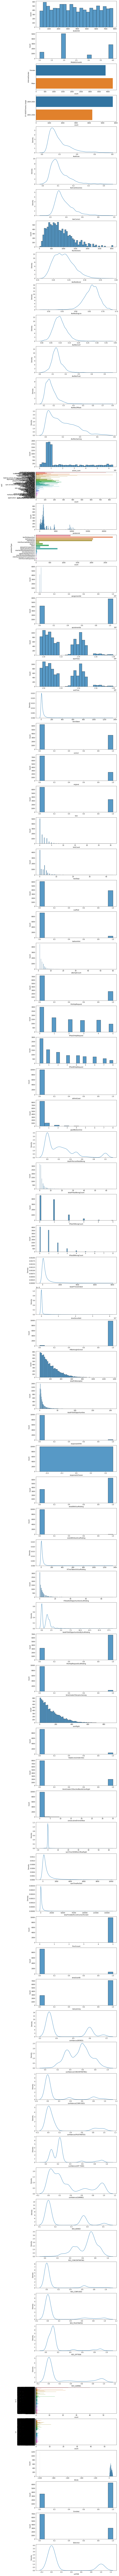

In [5]:
dataframe_summary(assistments.data)